In [1]:
#Import all cleaned datasets
import pandas as pd
X_train = pd.read_csv("../cleaned_datasets/X_train.csv")
X_valid = pd.read_csv("../cleaned_datasets/X_valid.csv")
y_train = pd.read_csv("../cleaned_datasets/y_train.csv")
y_valid = pd.read_csv("../cleaned_datasets/y_valid.csv")
X_test = pd.read_csv("../cleaned_datasets/X_test.csv")
y_test = pd.read_csv("../cleaned_datasets/y_test.csv")

The following block of code implemets a baseline model: Stacking Classifier, an ensemble method that combines multiple classification models to improve the overall performance. The idea is to train several models and then use their predictions as inputs for another model to make the final prediction.
We have created a StackingClassifier with two base models (RandomForestClassifier and XGBClassifier) and a RandomForestClassifier as the final estimator. This means that the outputs of the base models will be used as input to a RandomForestClassifier to make the final prediction.

# Baseline Model

In [2]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3)
xgb = XGBClassifier(n_estimators=100, max_depth=3)

ensemble = StackingClassifier(
    estimators=[('rf', rf),
                ('xgb', xgb)],
    final_estimator=RandomForestClassifier(n_estimators=50, max_depth=3))

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
from sklearn.metrics import accuracy_score

baseline_accuracy = accuracy_score(y_test,y_pred)

In [4]:
baseline_accuracy

0.8530544854155201

To assess the performance of the stacking classifier, accuracy_score metric was used. We have chosen the accuracy metric because for this particular dataset, the classes are balanced.

The following blocks of code are performing GridSearchCV to find the best hyperparameters for the StackingClassifier model.

The hyperparameters of the StackingClassifier include the hyperparameters of the base classifiers (n_estimators and max_depth for the RandomForestClassifier and the XGBClassifier) and the hyperparameters of the final classifier (n_estimators and max_depth for the final RandomForestClassifier). 

By using GridSearchCV, we can systematically search through a range of hyperparameters for each of these models and find the combination of hyperparameters that results in the best performance on the validation data, as measured by a chosen scoring metric. For this particular problem, the default scoring metric for the StackingClassifier will be used, which is the mean accuracy score (scoring='accuracy').

# Hyperparameter Tuning

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {    'rf__n_estimators': [50, 100],
    'rf__max_depth': [3, 5],
    'xgb__n_estimators': [50, 100],
    'xgb__max_depth': [3, 5],
    'final_estimator__n_estimators': [50, 100],
    'final_estimator__max_depth': [3, 5],
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)



/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rubabatwal/miniconda3/envs/ese-msc/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConvers

Best parameters:  {'final_estimator__max_depth': 5, 'final_estimator__n_estimators': 50, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__n_estimators': 100}
Best score:  0.9254437869822485


In [6]:
best_model = grid.best_estimator_

# Evaluate the best model on your test set
best_model_score = best_model.score(X_test, y_test)

# Print the best model's score
print("Best model's accuracy on test set: {:.3f}".format(best_model_score))

Best model's accuracy on test set: 0.893


It can be observed from the results above, that the accuracy score of the model improves after applying the best hyperparameters obtained from the GridSearch. 

The following block of code saves the best model.

# Saving the Best Model

In [7]:
import pickle
with open('tuned_sc_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Comparison of Models

The following block of code plot the Receiver Operating Characteristic (ROC) curves of both models(baseline model and best model) on the same plot. The ROC curve is a graphical representation of the performance of a binary classifier system, and the area under the curve (AUC) is a commonly used metric to measure the performance of the classifier. Higher AUC values indicate better performance.

Additionally, we have plotted the confusion matrix for both models which summarizes their performance by showing the number of correct and incorrect predictions.

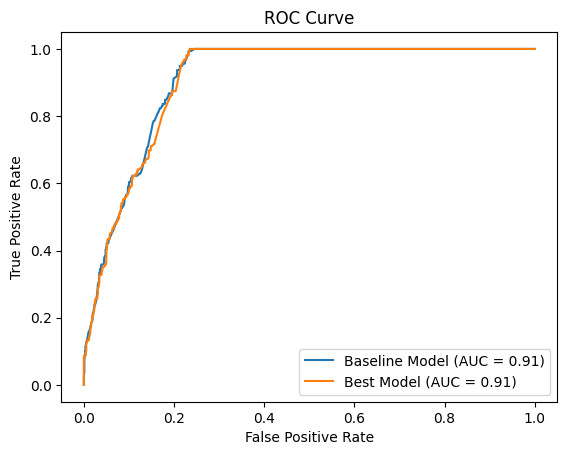

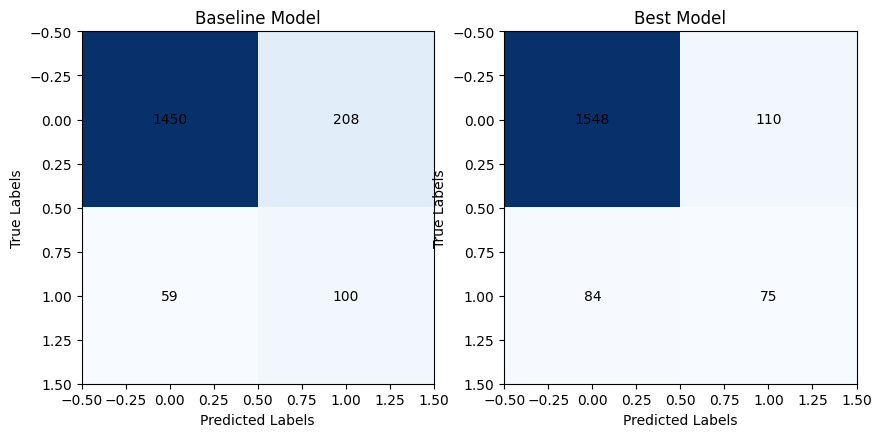

In [9]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have two models: model1 and model2

# Calculate the predicted probabilities of each model
y_pred_prob_model1 = ensemble.predict_proba(X_test)[:,1]
y_pred_prob_model2 = best_model.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and threshold for both models
fpr_model1, tpr_model1, threshold_model1 = roc_curve(y_test, y_pred_prob_model1)
fpr_model2, tpr_model2, threshold_model2 = roc_curve(y_test, y_pred_prob_model2)

# Calculate the area under the ROC curve (AUC) for both models
auc_model1 = auc(fpr_model1, tpr_model1)
auc_model2 = auc(fpr_model2, tpr_model2)

# Plot the ROC curves for both models
plt.plot(fpr_model1, tpr_model1, label='Baseline Model (AUC = {:.2f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='Best Model (AUC = {:.2f})'.format(auc_model2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate the confusion matrix for both models
y_pred_model1 = ensemble.predict(X_test)
y_pred_model2 = best_model.predict(X_test)
cm_model1 = confusion_matrix(y_test, y_pred_model1)
cm_model2 = confusion_matrix(y_test, y_pred_model2)

# Plot the confusion matrices for both models
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cm_model1, cmap='Blues')
axs[0].set_title('Baseline Model')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].grid(False)
for i in range(cm_model1.shape[0]):
    for j in range(cm_model1.shape[1]):
        axs[0].text(j, i, cm_model1[i, j], ha='center', va='center')
axs[1].imshow(cm_model2, cmap='Blues')
axs[1].set_title('Best Model')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].grid(False)
for i in range(cm_model2.shape[0]):
    for j in range(cm_model2.shape[1]):
        axs[1].text(j, i, cm_model2[i, j], ha='center', va='center')
plt.show()


From the above plots, it is evident that the two models have different accuracy scores but the same AUC, which means that they are achieving similar overall performance in terms of true positive and false positive rates across all possible thresholds, but the accuracy score is only capturing the performance at a single threshold.